In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
x=np.linspace(-10,15,500)

In [15]:
def poly(x):
    y=0.2*x**3-0.1*x**2-10*x
    return y

In [16]:
y=poly(x)

In [17]:
poly(47.7)

21001.737600000004

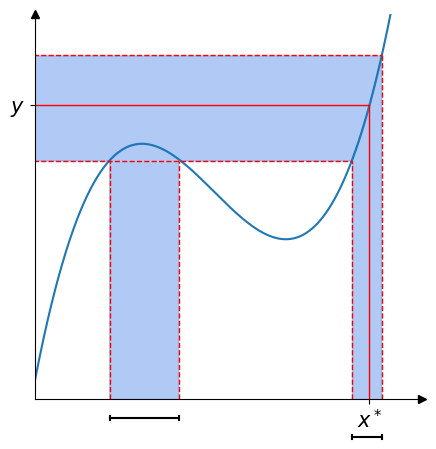

In [23]:
plt.figure(figsize=[5,5])
ax = plt.axes()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.plot(x,poly(x))
# fixed y
plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
# y lower
plt.plot([-10.5, 8], [16, 16], color='r', linestyle='--', linewidth=1)
plt.plot([8,8], [-120, 16], color='r', linestyle='--', linewidth=1)
plt.plot([-5.75,-5.75], [-120, 16], color='r', linestyle='--', linewidth=1)
# yupper
plt.plot([-10.5, 9.7], [76.12, 76.12], color='r', linestyle='--', linewidth=1)
plt.plot([9.7,9.7], [-120, 76.12], color='r', linestyle='--', linewidth=1)
plt.plot([-1.8,-1.8], [-120, 16], color='r', linestyle='--', linewidth=1)
plt.xlim([-10,12])
plt.ylim([-120,100])

#ticks
ax.set_yticks([47.7])
ax.set_yticklabels(['$y$'],fontsize=15)

ax.set_xticks([9])
ax.set_xticklabels(['$x^*$'],fontsize=15
                  )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

y2=np.copy(y)
y2[y2<16]=16
y2[y2>76.12]=76.12

ax.fill_between(x,-500,y,where=(x>=-5.75) & (x<-1.8), alpha=0.5,color='cornflowerblue')
ax.fill_between(x,-500,y,where=(x>=8) & (x<=9.7), alpha=0.5,color='cornflowerblue')
ax.fill_between(x,y2,76.12,alpha=0.5,where=(x<9.7),color='cornflowerblue')

ax.plot(1, -120, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(-10, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

trans = ax.get_xaxis_transform()
ax.annotate('', xy=(1, -.4), xycoords=trans, ha="center", va="top")
ax.plot([-5.75,-1.8],[-.05,-.05], color="k", transform=trans, clip_on=False)
ax.plot([8,9.7],[-.1,-.1], color="k", transform=trans, clip_on=False)
ax.plot([9.7,9.7],[-.095,-.105], color="k", transform=trans, clip_on=False)
ax.plot([8,8],[-.095,-.105], color="k", transform=trans, clip_on=False)
ax.plot([-5.75,-5.75],[-.09/2,-.11/2], color="k", transform=trans, clip_on=False)
ax.plot([-1.8,-1.8],[-.09/2,-.11/2], color="k", transform=trans, clip_on=False)
plt.savefig('calibration.pdf')  
plt.show()


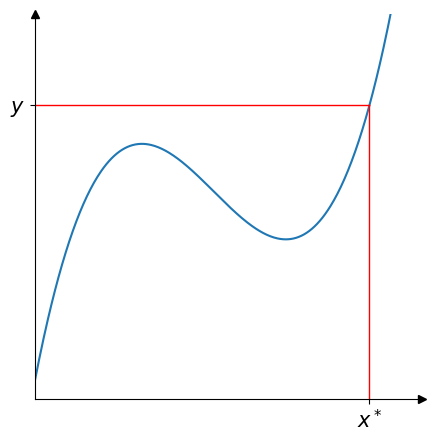

In [24]:
plt.figure(figsize=[5,5])
ax = plt.axes()
plt.plot(x,poly(x))
# fixed y
plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
plt.xlim([-10,12])
plt.ylim([-120,100])
#ticks
ax.set_yticks([47.7])
ax.set_yticklabels(['$y$'],fontsize=15)

ax.set_xticks([9])
ax.set_xticklabels(['$x^*$'],fontsize=15
                  )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.plot(1, -120, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(-10, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
plt.savefig('calibrationNoUncertainty.pdf')  
plt.show()


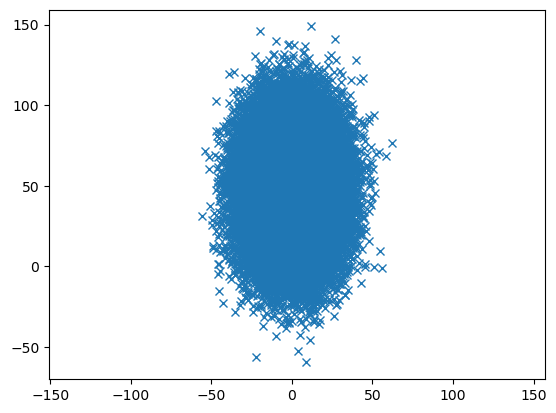

In [20]:
mean = [0, 47.7]
cov = [[200, 0], [0, 600]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean, cov, 50000).T
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

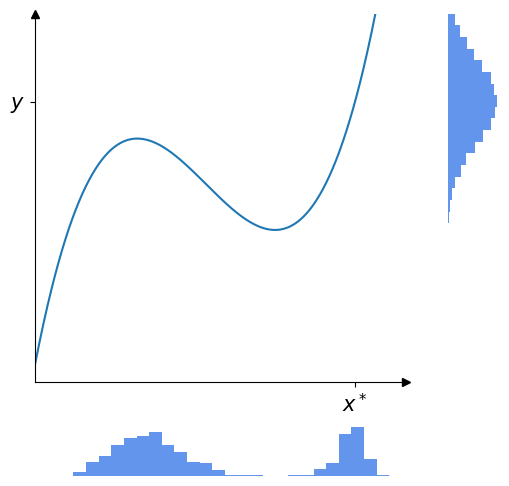

In [26]:
plt.figure()
fig, axes = plt.subplots(2,2,gridspec_kw={'height_ratios': [5, .7],'width_ratios': [5,.7]},figsize=(6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.plot(x,poly(x))
#ax1.plot(x1, y1, 'x',color='r')
# fixed y
#plt.plot([-10.5, 9], [47.7, 47.7], color='r', linestyle='-', linewidth=1)
#plt.plot([9, 9], [-120, 47.7], color='r', linestyle='-', linewidth=1)
ax1.set_xlim([-10,12])
ax1.set_ylim([-120,100])
#ticks
ax1.set_yticks([47.7])
ax1.set_yticklabels(['$y$'],fontsize=15)

ax1.set_xticks([9])
ax1.set_xticklabels(['$x^*$'],fontsize=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.plot(1, -120, ">k", transform=ax1.get_yaxis_transform(), clip_on=False)
ax1.plot(-10, 1, "^k", transform=ax1.get_xaxis_transform(), clip_on=False)

binwidth= 0.75
tol=5

ax3.hist(x1[np.abs(y1-poly(x1))<tol],bins=np.arange(min(x1[np.abs(y1-poly(x1))<tol]), max(x1[np.abs(y1-poly(x1))<tol]) + binwidth, binwidth),color='cornflowerblue',lw=1)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim([-10,12])

ax2.hist(y1,orientation="horizontal",color='cornflowerblue',bins=30)
ax2.set_ylim([-120,100])

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])

plt.savefig('calibrationNoUncertaintyGaussian.pdf')  
plt.show()

(array([6.0000e+00, 1.6300e+02, 1.5320e+03, 6.5670e+03, 1.4198e+04,
        1.5671e+04, 8.9110e+03, 2.5680e+03, 3.5900e+02, 2.5000e+01]),
 array([-59.72141539, -38.86684758, -18.01227977,   2.84228805,
         23.69685586,  44.55142367,  65.40599148,  86.2605593 ,
        107.11512711, 127.96969492, 148.82426274]),
 <BarContainer object of 10 artists>)

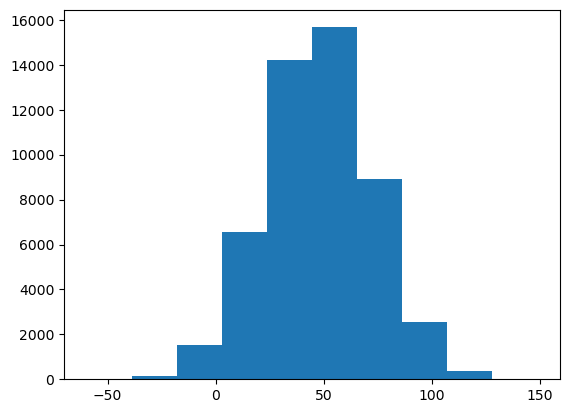

In [22]:
plt.hist(y1)

In [11]:
x1[np.abs(y1-poly(x1))<2]

array([-6.79704292,  7.6129755 , -3.97015942, -7.32069177, -6.96611351,
        7.1116505 ,  8.51949934,  8.46211108, -4.65438671,  0.61757196,
        8.36941097, -5.02579111, -5.04844589, -2.13236204, -6.12585043,
        9.30666659,  9.16745341,  8.42414068, -1.66097012,  8.59766201,
       10.02987806, -4.09347513,  8.2140321 , -4.671224  , -2.77699597,
        8.60648569, -2.04246903, -0.24430903,  8.72441889, -5.77101409,
       -7.00819908, -4.80369764, -5.61248334,  9.94637582,  7.01095517,
       -3.84366304, -0.73095611, -4.15029244,  9.58179042, -0.36893232,
        9.54897912, -5.98574234,  9.33122831, -1.54537869,  9.18475011,
       -5.55656311,  8.51188105,  8.24415593, -1.62823068,  9.50149581,
       -2.79525626,  9.33887887,  9.01943957, -6.36811748, -5.30149596,
       -2.99545096, -3.51130654, -0.70866474, -2.02123588, -3.55846242,
       -2.2995876 , -2.56218512, -4.94625811, -5.82675735, -2.31910992,
       -1.16243352, -2.20710339, -3.07694519, -0.1113032 ,  9.69

(array([ 55., 217., 233., 175.,  51.,   8.,   2.,  12.,  83., 224.]),
 array([-7.85706866, -6.04439413, -4.23171961, -2.41904508, -0.60637055,
         1.20630397,  3.0189785 ,  4.83165303,  6.64432755,  8.45700208,
        10.26967661]),
 <BarContainer object of 10 artists>)

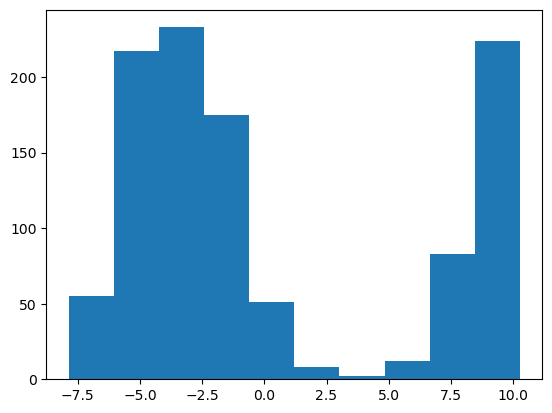

In [12]:
plt.hist(x1[np.abs(y1-poly(x1))<5])